In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from neomodel import (config, StructuredNode, StringProperty, IntegerProperty,
    UniqueIdProperty, RelationshipTo)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_pickle('2019-10-27_tweets_with_quotes.pkl')

In [3]:
df_users = pd.DataFrame([i for i in df['user'].values])

In [4]:
df_users = df_users.drop_duplicates(subset='id')

In [5]:
df_users.columns

Index(['contributors_enabled', 'created_at', 'default_profile',
       'default_profile_image', 'derived', 'description', 'favourites_count',
       'follow_request_sent', 'followers_count', 'following', 'friends_count',
       'geo_enabled', 'id', 'id_str', 'is_translator', 'lang', 'listed_count',
       'location', 'name', 'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image', 'protected',
       'screen_name', 'statuses_count', 'time_zone', 'translator_type', 'url',
       'utc_offset', 'verified'],
      dtype='object')

In [6]:
df_users[['favourites_count', 'followers_count', 'listed_count', 'statuses_count', 'friends_count', 'verified']].astype(float).describe()

,favourites_count,followers_count,listed_count,statuses_count,friends_count,verified
count,9147.000000,9.147000e+03,9147.000000,9.147000e+03,9147.000000,9147.000000
mean,13896.633213,3.650229e+04,121.590030,2.325887e+04,670.346124,0.009293
std,22844.072157,1.117805e+06,3758.360936,4.992255e+04,5318.714388,0.095955
min,0.000000,0.000000e+00,0.000000,3.000000e+00,0.000000,0.000000
25%,1945.000000,2.000000e+02,0.000000,4.724000e+03,208.000000,0.000000
50%,6545.000000,4.180000e+02,2.000000,1.267600e+04,362.000000,0.000000
75%,16541.500000,8.510000e+02,5.000000,2.665350e+04,619.000000,0.000000
max,436641.000000,7.939402e+07,219189.000000,1.778324e+06,350187.000000,1.000000


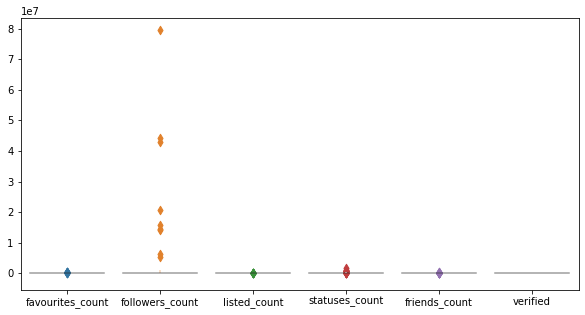

In [7]:
figsize(10, 5)
sns.boxenplot(data=df_users[['favourites_count', 'followers_count', 'listed_count', 'statuses_count', 'friends_count', 'verified']].astype(float))

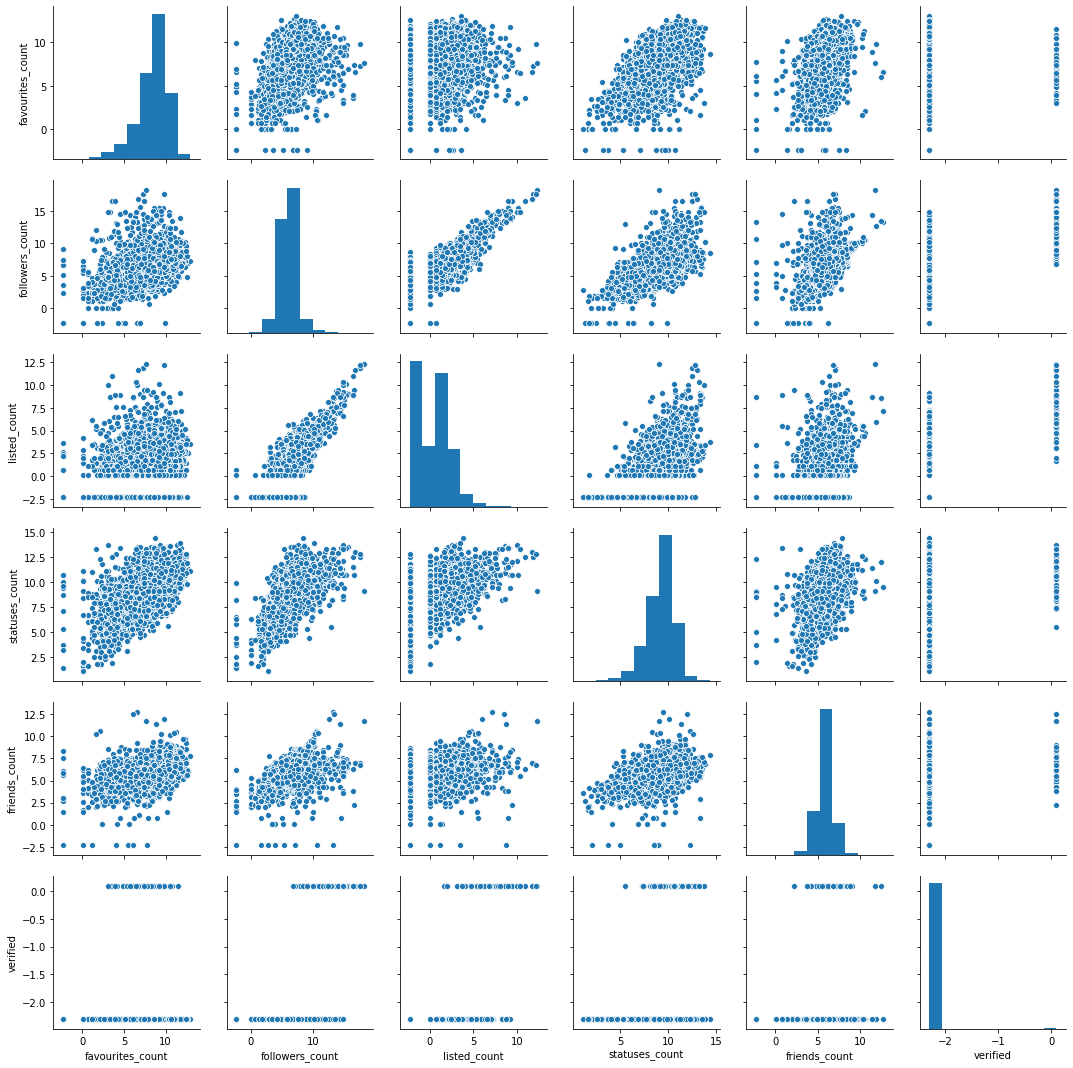

In [8]:
sns.pairplot(df_users[['favourites_count', 'followers_count', 'listed_count', 'statuses_count', 'friends_count', 'verified']].astype(float).apply(lambda x: np.log(x+0.1)))

In [16]:
df_users.to_pickle('2019-10-27_users.pkl')

In [11]:
df_users['id'].nunique()

9147

In [16]:
df_users[df_users['followers_count'] > 25].shape

(8894, 40)

In [17]:
df

,contributors,coordinates,created_at,created_at_date,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,translated_text,truncated,user
0,None,None,2018-11-22 10:34:24+00:00,2018-11-22 10:34:24+00:00,NaN,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,NaN,2,False,...,NaN,0,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Hoy ka yawa kasakit sa gi vaccine sa ako, pero...",{'translatedText': 'You are so sick of the vac...,False,"{'contributors_enabled': False, 'created_at': ..."
1,None,"{'coordinates': [121.04515361, 14.39491723], '...",2017-08-22 10:58:20+00:00,2017-08-22 10:58:20+00:00,NaN,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,NaN,0,False,...,NaN,0,0,False,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",Isla: Got my 1st dose of Flu vaccine earlier!!...,{'translatedText': 'Island: Got my 1st dose of...,False,"{'contributors_enabled': False, 'created_at': ..."
2,None,None,2016-02-06 03:58:00+00:00,2016-02-06 03:58:00+00:00,NaN,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,NaN,0,False,...,NaN,0,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Dengue.,"{'translatedText': 'Dengue.', 'input': 'Dengue.'}",False,"{'contributors_enabled': False, 'created_at': ..."
3,None,None,2019-07-21 08:50:01+00:00,2019-07-21 08:50:01+00:00,"[0, 28]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/EO...,NaN,2,False,...,NaN,1,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Dengue Nurse feeeels hahaha! https://t.co/EOTt...,{'translatedText': 'Dengue Nurse feeeels hahah...,False,"{'contributors_enabled': False, 'created_at': ..."
4,None,None,2019-02-08 00:11:47+00:00,2019-02-08 00:11:47+00:00,"[0, 140]","{'hashtags': [{'indices': [93, 101], 'text': '...",NaN,"{'display_text_range': [0, 276], 'entities': {...",0,False,...,"{'display': 'twitter.com/cnnphilippines…', 'ex...",0,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@WHOPhilippines Representative @GundoWeiler em...,{'translatedText': '@WHOPhilippines Representa...,True,"{'contributors_enabled': False, 'created_at': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,None,None,Mon Nov 20 08:04:06 +0000 2017,2017-11-20 08:04:06+00:00,"[0, 64]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/t4...,NaN,2103,False,...,NaN,21,838,False,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",10+ Daily Struggles Of Living With A Cat\nhttp...,NaN,False,"{'contributors_enabled': False, 'created_at': ..."
0,None,None,Fri Feb 15 11:08:23 +0000 2019,2019-02-15 11:08:23+00:00,"[0, 120]","{'hashtags': [], 'media': [{'additional_media_...",{'media': [{'additional_media_info': {'monetiz...,NaN,18,False,...,NaN,0,12,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",WATCH: Duterte appeals to all Filipino parents...,NaN,False,"{'contributors_enabled': False, 'created_at': ..."
0,None,None,Mon Aug 12 07:19:46 +0000 2019,2019-08-12 07:19:46+00:00,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,"{'display_text_range': [0, 287], 'entities': {...",14,False,...,NaN,2,1,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Correct me if I am wrong. Two major reasons wh...,NaN,True,"{'contributors_enabled': False, 'created_at': ..."
0,None,None,Sun Feb 10 11:36:17 +0000 2019,2019-02-10 11:36:17+00:00,NaN,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,"{'display_text_range': [0, 143], 'entities': {...",94,False,...,NaN,35,23,False,NaN,"<a href=""https://www.echobox.com"" rel=""nofollo...",A viral video shows employees of the Baguio Ci...,NaN,True,"{'contributors_enabled': False, 'created_at': ..."
